# Introduction to Convolutional Neural Networks and Computer Vision with TensorFLow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of self-driving car recognizing the car in front.

## Get the data 

The images we're working with are from the Food101 dataset (101 different classes of food)

However we've modified it to only use two classes (pizza and steak).

**NOTE:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [8]:
import os
import zipfile
import wget

url = 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'
filename = 'pizza_steak.zip'

# Download only if the file doesn't already exist
if not os.path.exists(filename):
    print("Downloading the file...")
    downloaded_file = wget.download(url)
else:
    print("File already exists, skipping download.")

# Unzip only if the zip file is present
if os.path.exists(filename):
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()
    print("Extraction complete.")   

File already exists, skipping download.
Extraction complete.


## Inspect the data (become one with the data)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project..... this usually means visualizing many samples of your data.


In [9]:
# Walk through pizza_steak directory and list number of files 
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak\test
There are 0 directories and 250 images in pizza_steak\test\pizza
There are 0 directories and 250 images in pizza_steak\test\steak
There are 2 directories and 0 images in pizza_steak\train
There are 0 directories and 750 images in pizza_steak\train\pizza
There are 0 directories and 750 images in pizza_steak\train\steak


In [11]:
# Another way to find out how many images in a file 
num_steak_images_train = len(os.listdir(path='pizza_steak/train/steak'))
num_steak_images_train

750

**To visualize our images, first let's get the class names programatically.**

In [14]:
# Get the classnames programatically
import pathlib 
import numpy as np 
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [68]:
# Let's visualize our images 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import random 

def view_random_image(target_dir):
    target_class = random.choice(['pizza', 'steak'])
    # Set the target directory (we'll view images from here)
    target_folder = target_dir + '/' + target_class
    print(target_folder)

    # Get a random image path 
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');

    print(f'Image shape: {img.shape}')
    return img 



pizza_steak/train/pizza
['3713343.jpg']
Image shape: (512, 512, 3)


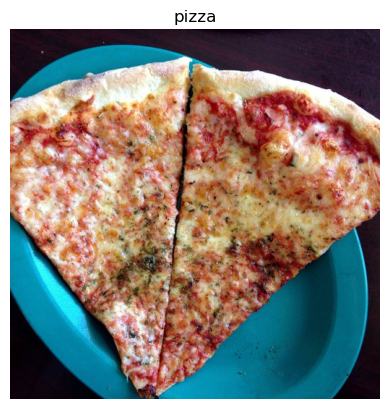

In [69]:
# View a random image from the training dataset 
img = view_random_image(target_dir='pizza_steak/train')

In [70]:
import tensorflow as tf 
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[33,  7, 16],
        [34,  8, 19],
        [34,  8, 19],
        ...,
        [32, 17, 40],
        [36, 21, 44],
        [41, 26, 49]],

       [[32,  5, 14],
        [35,  7, 19],
        [37, 11, 22],
        ...,
        [36, 21, 44],
        [40, 25, 48],
        [44, 29, 52]],

       [[36,  6, 16],
        [36,  8, 20],
        [38, 10, 22],
        ...,
        [41, 26, 49],
        [45, 30, 53],
        [48, 33, 56]],

       ...,

       [[12,  1,  9],
        [12,  1,  9],
        [12,  1,  9],
        ...,
        [15,  3, 13],
        [15,  3, 13],
        [16,  4, 14]],

       [[12,  1,  9],
        [13,  2, 10],
        [13,  2, 10],
        ...,
        [17,  5, 15],
        [16,  4, 14],
        [15,  3, 13]],

       [[13,  2, 10],
        [13,  2, 10],
        [13,  2, 10],
        ...,
        [19,  7, 17],
        [17,  5, 15],
        [15,  3, 13]]], dtype=uint8)>

In [71]:
# View the image shape 
img.shape # returns width, height, colour channels 

(512, 512, 3)

In [74]:
# Get all the pixel values between 0 and 1 
img / 225.

array([[[0.14666667, 0.03111111, 0.07111111],
        [0.15111111, 0.03555556, 0.08444444],
        [0.15111111, 0.03555556, 0.08444444],
        ...,
        [0.14222222, 0.07555556, 0.17777778],
        [0.16      , 0.09333333, 0.19555556],
        [0.18222222, 0.11555556, 0.21777778]],

       [[0.14222222, 0.02222222, 0.06222222],
        [0.15555556, 0.03111111, 0.08444444],
        [0.16444444, 0.04888889, 0.09777778],
        ...,
        [0.16      , 0.09333333, 0.19555556],
        [0.17777778, 0.11111111, 0.21333333],
        [0.19555556, 0.12888889, 0.23111111]],

       [[0.16      , 0.02666667, 0.07111111],
        [0.16      , 0.03555556, 0.08888889],
        [0.16888889, 0.04444444, 0.09777778],
        ...,
        [0.18222222, 0.11555556, 0.21777778],
        [0.2       , 0.13333333, 0.23555556],
        [0.21333333, 0.14666667, 0.24888889]],

       ...,

       [[0.05333333, 0.00444444, 0.04      ],
        [0.05333333, 0.00444444, 0.04      ],
        [0.05333333, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way:
- Load our images
- Preprocess our images
- Build a CNN to find patterns in our images
- Compile our CNN
- Fit the CNN to our training data

In [82]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed 
tf.random.set_seed(42)

# Preprocess data (get all pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen = ImageDataGenerator(rescale=1./255.)

# Setup paths to our data directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'
# Import data from directories and turn in into batches 
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              shuffle=True,
                                              target_size=(224, 224),
                                              class_mode='binary',
                                              seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             shuffle=False,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             seed=42)


# Build a CNN Model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(224, 224, 3)),
        tf.keras.layers.Conv2D(filters=10,
                              kernel_size=3,
                              activation='relu'),
        tf.keras.layers.Conv2D(10, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2,
                                 padding='valid'),
        tf.keras.layers.Conv2D(10, 3, activation='relu'),
        tf.keras.layers.Conv2D(10, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)


# Compile our CNN 
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model 
history_1 = model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


C:\Users\yashs\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 350ms/step - accuracy: 0.5877 - loss: 0.6706 - val_accuracy: 0.8100 - val_loss: 0.4206
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - accuracy: 0.7996 - loss: 0.4366 - val_accuracy: 0.8640 - val_loss: 0.3393
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step - accuracy: 0.8245 - loss: 0.3956 - val_accuracy: 0.8540 - val_loss: 0.3435
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - accuracy: 0.8322 - loss: 0.3922 - val_accuracy: 0.8720 - val_loss: 0.3291
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 235ms/step - accuracy: 0.8656 - loss: 0.3244 - val_accuracy: 0.8820 - val_loss: 0.3083


<Axes: >

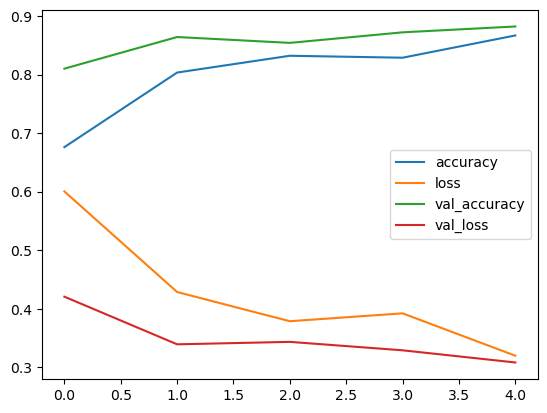

In [83]:
import pandas as pd 
pd.DataFrame(history_1.history).plot()

In [84]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Using the same model as before

Let's replicate the model we've build in a previous section to see if it works with our image data.


In [85]:
# Set random seed 
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

model_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_2 = model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - accuracy: 0.5169 - loss: 0.6911 - val_accuracy: 0.4980 - val_loss: 0.6996
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - accuracy: 0.5226 - loss: 0.6931 - val_accuracy: 0.4980 - val_loss: 0.6996
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.4999 - loss: 0.6932 - val_accuracy: 0.4980 - val_loss: 0.6996
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - accuracy: 0.5140 - loss: 0.6931 - val_accuracy: 0.4980 - val_loss: 0.6996
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - accuracy: 0.5029 - loss: 0.6932 - val_accuracy: 0.4980 - val_loss: 0.6996


<Axes: >

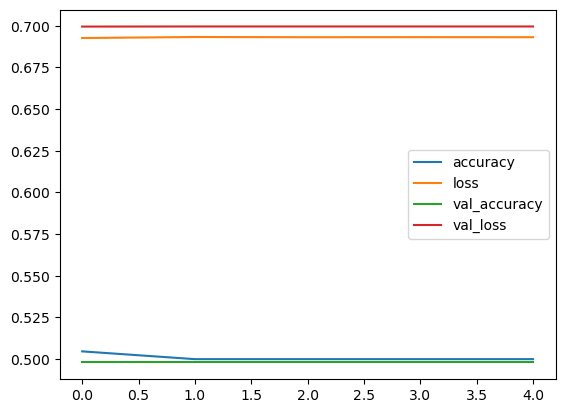

In [86]:
pd.DataFrame(history_2.history).plot()

**It's just guessing just like flip a coin**

In [88]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

**Despite having 20x more params than our CNN (model_1), model_2 performs teribly let's try to improve it**

In [91]:
# Set the random seed 
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model 
model_3.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Fit the model 
history_3 = model_3.fit(train_data, 
                       epochs=5,
                       validation_data=valid_data,
                       steps_per_epoch=len(train_data),
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 229ms/step - accuracy: 0.5375 - loss: 5.1520 - val_accuracy: 0.6420 - val_loss: 0.7334
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - accuracy: 0.6018 - loss: 0.9771 - val_accuracy: 0.6520 - val_loss: 0.6745
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 219ms/step - accuracy: 0.7238 - loss: 0.7368 - val_accuracy: 0.7400 - val_loss: 0.5137
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - accuracy: 0.7675 - loss: 0.4920 - val_accuracy: 0.7540 - val_loss: 0.4828
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 226ms/step - accuracy: 0.7226 - loss: 0.7001 - val_accuracy: 0.5440 - val_loss: 0.9538


<Axes: >

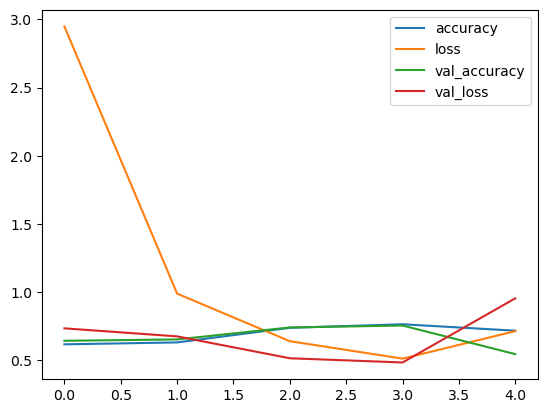

In [92]:
pd.DataFrame(history_3.history).plot()

In [93]:
model_3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

**around 1 crore params still not good than our model_1 (CNN)**